In [10]:
# Cell 1: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
from IPython.display import display, Markdown
import os

sns.set(style="whitegrid")


In [11]:
class SolarDataComparator:
    def __init__(self, file_paths: dict):
        self.file_paths = file_paths
        self.data = None
        self.summary_table = None
        self.anova_result = None

    def load_and_combine(self):
        combined = []
        for country, path in self.file_paths.items():
            df = pd.read_csv(path)
            df['Country'] = country
            combined.append(df[['GHI', 'DNI', 'DHI', 'Country']])
        self.data = pd.concat(combined, ignore_index=True)

    def plot_boxplots(self):
        metrics = ['GHI', 'DNI', 'DHI']
        for metric in metrics:
            plt.figure(figsize=(8, 5))
            sns.boxplot(data=self.data, x='Country', y=metric, palette='Set3')
            plt.title(f'{metric} Distribution by Country')
            plt.ylabel(f'{metric} (W/m²)')
            plt.grid(axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

    def compute_summary_table(self):
        self.summary_table = self.data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
        self.summary_table = self.summary_table.round(2)

    def show_summary_table(self):
        if self.summary_table is None:
            self.compute_summary_table()

        display_table = self.summary_table.copy()
        display_table.columns = ['_'.join(col).strip() for col in display_table.columns.values]
        display_table.reset_index(inplace=True)

        fig, ax = plt.subplots(figsize=(10, 2 + len(display_table) * 0.5))
        ax.axis('off')
        table = ax.table(cellText=display_table.values,
                         colLabels=display_table.columns,
                         loc='center',
                         cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)
        plt.title("Summary Statistics Table", fontweight='bold')
        plt.tight_layout()
        plt.show()

    def perform_statistical_test(self):
        groups = [df['GHI'].values for _, df in self.data.groupby('Country')]
        self.anova_result = f_oneway(*groups)
        print(f"One-way ANOVA p-value for GHI: {self.anova_result.pvalue:.5f}")

    def plot_avg_ghi_bar(self):
        avg_ghi = self.data.groupby('Country')['GHI'].mean().sort_values(ascending=False)
        plt.figure(figsize=(6, 4))
        sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')
        for i, val in enumerate(avg_ghi.values):
            plt.text(val + 1, i, f'{val:.2f}', va='center')
        plt.xlabel('Average GHI (W/m²)')
        plt.title('Average GHI per Country')
        plt.tight_layout()
        plt.show()

    def key_observations(self):
        if self.summary_table is None:
            self.compute_summary_table()

        obs = []
        ghi_stats = self.summary_table['GHI']
        max_median = ghi_stats['median'].idxmax()
        max_std = ghi_stats['std'].idxmax()
        min_median = ghi_stats['median'].idxmin()

        obs.append(f"🔆 {max_median} has the **highest median GHI** ({ghi_stats['median'][max_median]:.2f}).")
        obs.append(f"📈 {max_std} shows the **greatest variability in GHI** (std = {ghi_stats['std'][max_std]:.2f}).")
        obs.append(f"🔅 {min_median} has the **lowest median GHI** ({ghi_stats['median'][min_median]:.2f}).")

        if self.anova_result:
            obs.append(f"📊 ANOVA p-value: **{self.anova_result.pvalue:.2e}** – " +
                       ("significant" if self.anova_result.pvalue < 0.05 else "not significant"))

        print("\n🔍 **Key Observations:**")
        for line in obs:
            print("-", line)


C:\Users\doff n\AppData\Local\Temp\ipykernel_21728\3846886337.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.data, x='Country', y=metric, palette='Set3')


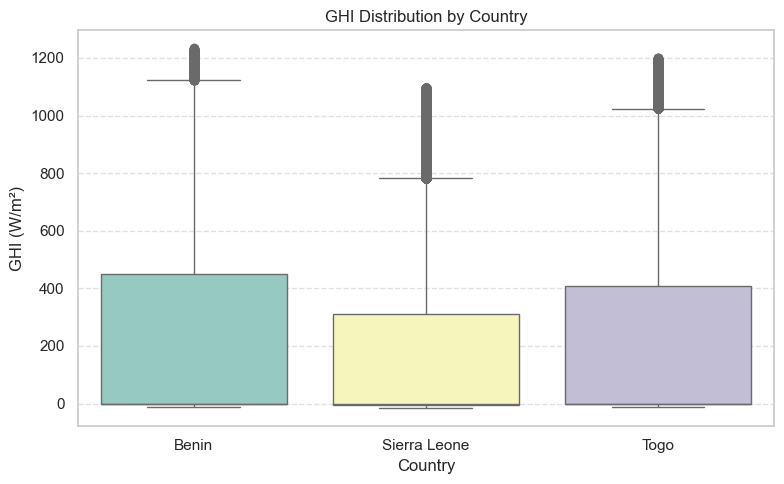

C:\Users\doff n\AppData\Local\Temp\ipykernel_21728\3846886337.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.data, x='Country', y=metric, palette='Set3')


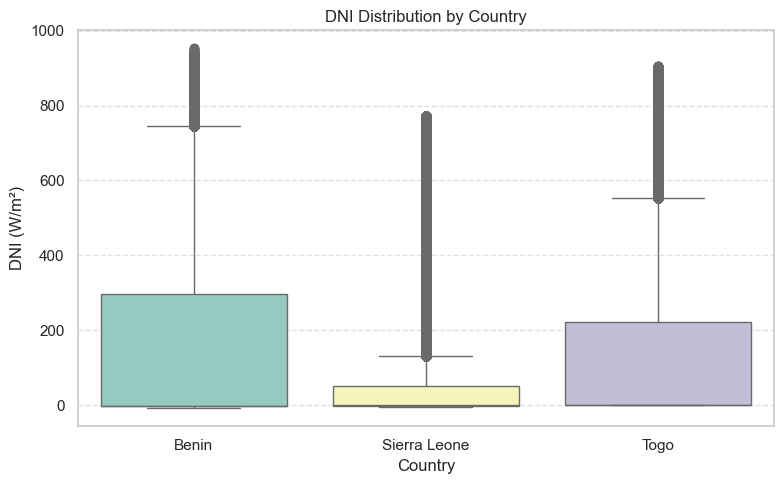

C:\Users\doff n\AppData\Local\Temp\ipykernel_21728\3846886337.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.data, x='Country', y=metric, palette='Set3')


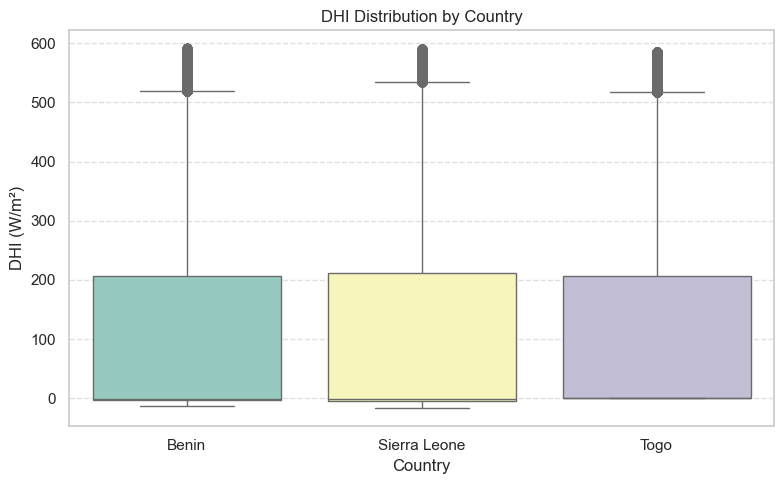

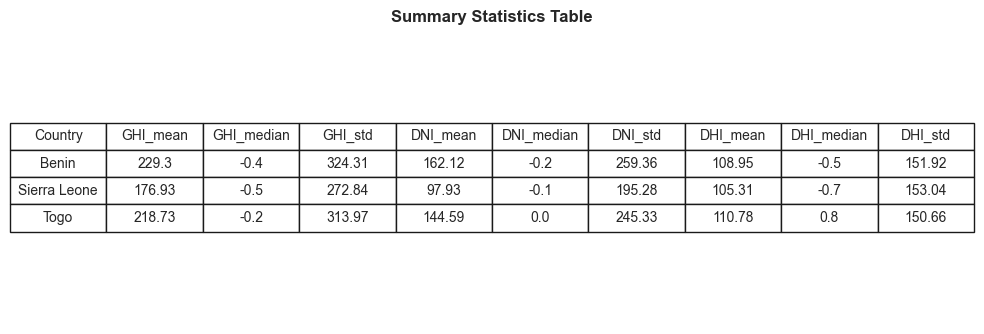

One-way ANOVA p-value for GHI: 0.00000


C:\Users\doff n\AppData\Local\Temp\ipykernel_21728\3846886337.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


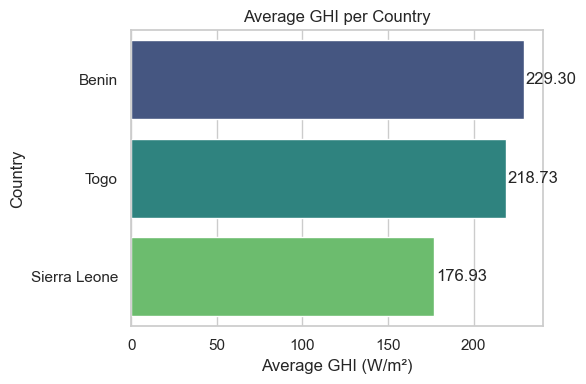


🔍 **Key Observations:**
- 🔆 Togo has the **highest median GHI** (-0.20).
- 📈 Benin shows the **greatest variability in GHI** (std = 324.31).
- 🔅 Sierra Leone has the **lowest median GHI** (-0.50).
- 📊 ANOVA p-value: **0.00e+00** – significant


In [12]:
# Cell 3: Run Comparison
import os

base_dir = '../data/cleaned'
file_paths = {
    'Benin': os.path.join(base_dir, 'benin_clean.csv'),
    'Sierra Leone': os.path.join(base_dir, 'sierraleone_clean.csv'),
    'Togo': os.path.join(base_dir, 'togo_clean.csv')
}

comparator = SolarDataComparator(file_paths)
comparator.load_and_combine()
comparator.plot_boxplots()
comparator.compute_summary_table()
comparator.show_summary_table()
comparator.perform_statistical_test()
comparator.plot_avg_ghi_bar()
comparator.key_observations()